# Investigating Airplane Accidents
## Dataset description
Airplane accidents from 1948 to 2015 in the US. It only contains 6 recorded accidents from 1948 to 1981 - these rows will be removed.
## To-do:
- \# of accidents in each US state / % accidents
- \# of injuries per month
- \# of accidents per air carrier
- \# of accidents per airplane make and model
- Phase of flight where accidents occur
- Purpose of flight
- Percentage of accidents under adverse weather conditions
- Change of number of accidents throughout the years: Does the number of accidents decrease? Any special years?
- Map out accidents using the basemap library for matplotlib

In [1]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

import pandas as pd # Data processing
pd.options.display.max_columns = 32 # show all columns
import numpy as np # Linear algebra
import datetime


import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

In [2]:
# Helper functions
# Donut plots
def donut_plot(series,title,axis):

    ### Pie plot
    series.plot.pie(
        title="Airplane Accidents in the USA from 1982 to 2015\n"+title,
        ax=axis,
        startangle=0,
        autopct='%1.1f%%', # returns percentage values
        fontsize=12,
        pctdistance=0.85 # percent label position
    )

    axis.set_ylabel('')

    # Aesthetics: Draw circle on pie --> donut chart
    centre_circle = plt.Circle((0,0),0.7,fc='white')
    axis.add_patch(centre_circle)
    axis.title.set_size(18)

In [3]:
aviation_data = pd.read_csv("AviationData.txt",sep="|")

## Data cleaning
To-do:
- Strip whitespaces
- Replace empty values with numpy.NaN
- Drop last column -it has new line values
- Location: Replace value with state
- Convert columns to float: Latitude, Longitude
- Convert columns to int: Number of Engines, Total Fatal Injuries, Total Serious Injuries, Total Minor Injuries, Total Uninjured
- Convert columns to datetime: Event Date, Publication Date
- Convert to bool: Amateur built
- Remove accidents from 1948 to 1981 - it only contains 6 data entries

In [4]:
aviation_data_trimmed = aviation_data.apply( # strip whitespaces
    lambda x: x.str.strip()).replace(
    '', np.NaN) # replace null values with NaN

In [5]:
aviation_data_trimmed.drop(' ', axis=1, inplace=True) # drop last column with empty values
aviation_data_trimmed.rename(columns=lambda x : x.strip(),inplace=True)

In [6]:
aviation_data_trimmed.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date
0,20150908X74637,Accident,CEN15LA402,09/08/2015,"Freeport, IL",United States,42.246111,-89.581945,KFEP,albertus Airport,Non-Fatal,Substantial,Unknown,N24TL,CLARKE REGINALD W,DRAGONFLY MK,NaN,NaN,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,1,NaN,NaN,VMC,TAKEOFF,Preliminary,09/09/2015
1,20150906X32704,Accident,ERA15LA339,09/05/2015,"Laconia, NH",United States,43.606389,-71.452778,LCI,Laconia Municipal Airport,Fatal(1),Substantial,Weight-Shift,N2264X,EVOLUTION AIRCRAFT INC,REVO,No,1,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1,NaN,NaN,NaN,VMC,MANEUVERING,Preliminary,09/10/2015
2,20150908X00229,Accident,GAA15CA251,09/04/2015,"Hayes, SD",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N321DA,AIR TRACTOR INC,AT 402A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN
3,20150903X33216,Accident,WPR15FA256,09/03/2015,"Santee, CA",United States,32.829445,-116.988611,SEE,GILLESPIE FIELD,Fatal(2),Substantial,Airplane,N8441B,PIPER,PA28,No,1,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,2,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,09/09/2015
4,20150903X34535,Accident,ERA15LA338,09/03/2015,"Cresskill, NJ",United States,40.935833,-73.958611,NaN,N/A,Non-Fatal,Destroyed,Airplane,N758DK,CESSNA,R172K,No,1,Reciprocating,Public Use,NaN,Aerial Observation,NaN,NaN,2,NaN,NaN,VMC,NaN,Preliminary,09/10/2015


In [7]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

def replace_state(loc):
    '''Finds wether the location value has a US state in the string
    Takes in a value from row
    Returns either state or other if accident does not occur in the US"
    '''
    for state in states:
        if state in loc:
            return state
    return "other"

aviation_data_trimmed['Location'] = aviation_data_trimmed['Location'].astype("str").apply(replace_state) #astype("str") required due to NaN values

In [8]:
columns_to_float = ['Latitude','Longitude']
for col in columns_to_float:
    aviation_data_trimmed[col] = aviation_data_trimmed[col].astype("float")

columns_to_int = ["Number of Engines", "Total Fatal Injuries", "Total Serious Injuries", 
                  "Total Minor Injuries", "Total Uninjured"]
aviation_data_trimmed["Number of Engines"] = aviation_data_trimmed["Number of Engines"].fillna(1) # fill NaN values with 1 for Number of Engines
for col in columns_to_int:
    aviation_data_trimmed[col] = aviation_data_trimmed[col].fillna(0) # fill NaN values with 0 -except for Number of Engines
    aviation_data_trimmed[col] = aviation_data_trimmed[col].astype("int")

columns_to_datetime = ["Event Date", "Publication Date"]
for col in columns_to_datetime:
    aviation_data_trimmed[col] = pd.to_datetime(aviation_data_trimmed[col])

map_bool = {'Yes': True, 'No': False}
aviation_data_trimmed["Amateur Built"] = aviation_data_trimmed["Amateur Built"].map(map_bool)

aviation_data_trimmed["Make"] = aviation_data_trimmed["Make"].apply(lambda x: str(x).capitalize()) # Capitalize make names

In [9]:
data_clean = aviation_data_trimmed[aviation_data_trimmed["Event Date"].dt.year > 1981].copy()
data_clean.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date
0,20150908X74637,Accident,CEN15LA402,2015-09-08,IL,United States,42.246111,-89.581945,KFEP,albertus Airport,Non-Fatal,Substantial,Unknown,N24TL,Clarke reginald w,DRAGONFLY MK,NaN,1,NaN,Part 91: General Aviation,NaN,Personal,NaN,0,1,0,0,VMC,TAKEOFF,Preliminary,2015-09-09
1,20150906X32704,Accident,ERA15LA339,2015-09-05,NH,United States,43.606389,-71.452778,LCI,Laconia Municipal Airport,Fatal(1),Substantial,Weight-Shift,N2264X,Evolution aircraft inc,REVO,False,1,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1,0,0,0,VMC,MANEUVERING,Preliminary,2015-09-10
2,20150908X00229,Accident,GAA15CA251,2015-09-04,SD,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N321DA,Air tractor inc,AT 402A,NaN,1,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,Preliminary,NaT
3,20150903X33216,Accident,WPR15FA256,2015-09-03,CA,United States,32.829445,-116.988611,SEE,GILLESPIE FIELD,Fatal(2),Substantial,Airplane,N8441B,Piper,PA28,False,1,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,2,0,0,0,VMC,TAKEOFF,Preliminary,2015-09-09
4,20150903X34535,Accident,ERA15LA338,2015-09-03,NJ,United States,40.935833,-73.958611,NaN,N/A,Non-Fatal,Destroyed,Airplane,N758DK,Cessna,R172K,False,1,Reciprocating,Public Use,NaN,Aerial Observation,NaN,0,2,0,0,VMC,NaN,Preliminary,2015-09-10


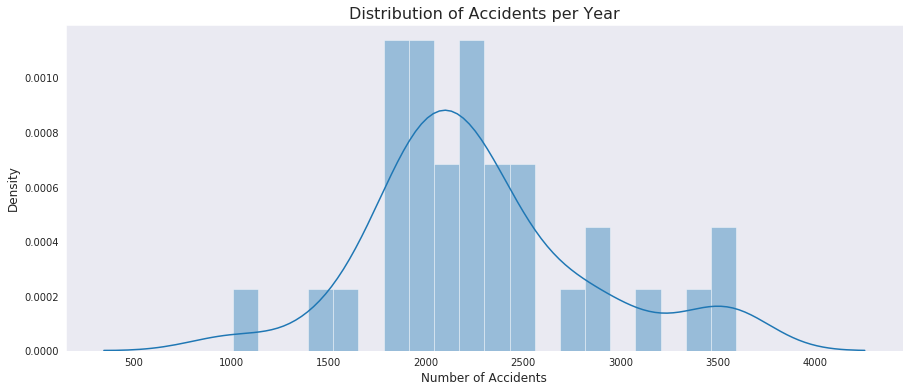

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
accidents_per_year = data_clean["Event Date"].dt.year.value_counts()
sns.distplot(accidents_per_year,bins=20);
plt.xlabel("Number of Accidents",fontsize=12);
plt.ylabel("Density",fontsize=12);
plt.title("Distribution of Accidents per Year",fontsize=16);

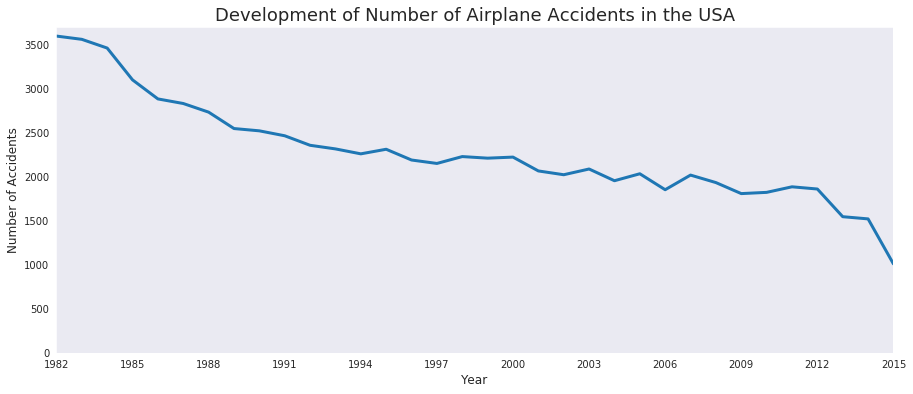

In [11]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(x=accidents_per_year.index,
            y=accidents_per_year, 
            linewidth=3,
            ax = ax
)
ax.set_ylabel("Number of Accidents",fontsize=12)
ax.set_xlabel("Year",fontsize=12)
ax.set_xlim([1982,2015])
ax.set_ylim([0,3700])
ax.set_xticks(np.linspace(1982,2015,12,dtype=int,endpoint=True));
ax.set_title("Development of Number of Airplane Accidents in the USA",fontsize=18);

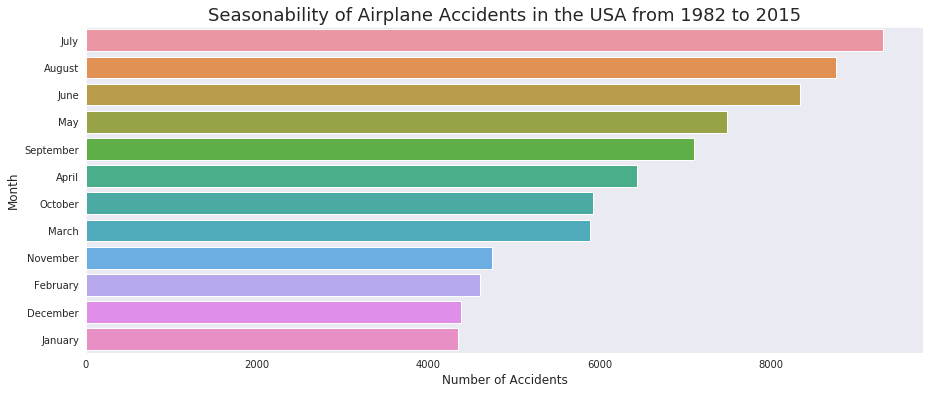

In [12]:
accidents_per_month = data_clean["Event Date"].dt.month.value_counts()

months_mapper = {}
for i in range(1,13):
    months_mapper[i] = (datetime.date(2019, i, 1).strftime('%B')) #returns months of the year
    
accidents_per_month.index = accidents_per_month.index.map(mapper=months_mapper)

fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(y=accidents_per_month.index,
            x=accidents_per_month
           )
ax.set_xlabel("Number of Accidents",fontsize=12)
ax.set_ylabel("Month",fontsize=12)
ax.set_title("Seasonability of Airplane Accidents in the USA from 1982 to 2015",fontsize=18);
# this will need to be compared to each year
# this would need to be compared to the amount of flights each month (we do not have this in our dataset)

In [13]:
# Rethink this. Idea: Make a catplot/multiple bar plot that shows the mean n of accidents per month and each bar will be a decade

# data_clean["Year"] = data_clean["Event Date"].dt.year
# data_clean["Month"] = data_clean["Event Date"].dt.month

# seasonability_year = data_clean["Month"].groupby(data_clean["Year"]).value_counts()
# seasonability_year_df = seasonability_year.unstack(level=0)
# seasonability_year_df.index = seasonability_year_df.index.map(mapper=months_mapper)
# seasonability_year_df["1980s"] = seasonability_year_df.iloc[:,:8].mean(axis=1)
# seasonability_year_df["1990s"] = seasonability_year_df.iloc[:,8:18].mean(axis=1)
# seasonability_year_df["2000s"] = seasonability_year_df.iloc[:,18:28].mean(axis=1)
# seasonability_year_df["2010s"] = seasonability_year_df.iloc[:,28:].mean(axis=1)
# seasonability_decades = seasonability_year_df.iloc[:, -4:]
# # fig, ax = plt.subplots(figsize=(15,6))
# # sns.barplot(x=seasonability_year_df.index,y=seasonability_year_df.loc[:,1982:1990].mean(axis=1),ax=ax)
# # sns.barplot(x=seasonability_year_df.index,y=seasonability_year_df.loc[:,1990:2000].mean(axis=1),ax=ax)
# # sns.barplot(x=seasonability_year_df.index,y=seasonability_year_df.loc[:,2000:2010].mean(axis=1),ax=ax)
# # sns.barplot(x=seasonability_year_df.index,y=seasonability_year_df.loc[:,2010:2015].mean(axis=1),ax=ax)
# #catplot hue= decade
# # sns.catplot(x=seasonability_decades.index,y=seasonability_decades,hue=seasonability_decades.columns,ax=ax)
# seasonability_decades
# # pd.melt(seasonability_decades, id_vars="Year", var_name="Month", value_name="mean_accidents")
# #  sns.catplot(x="class", y="survived", hue="sex", data=titanic,
# #                 height=6, kind="bar", palette="muted")
# # sns.catplot(y=seasonability_decades.index,x=seasonability_decades,hue=seasonability_decades.columns,ax=ax,kind="bar")

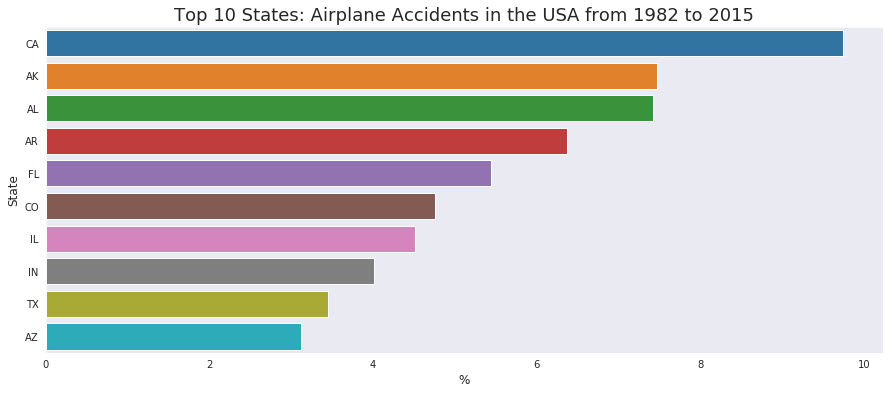

In [14]:
accidents_per_state = data_clean["Location"].value_counts()/len(data_clean) * 100
accidents_per_state.drop("other",inplace=True) # other represents accidents ocurred outside of the US

fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(y=accidents_per_state.index[:10],x=accidents_per_state[:10]); # select top 10 values

ax.set_xlabel("%",fontsize=12)
ax.set_ylabel("State",fontsize=12)
ax.set_title("Top 10 States: Airplane Accidents in the USA from 1982 to 2015",fontsize=18);

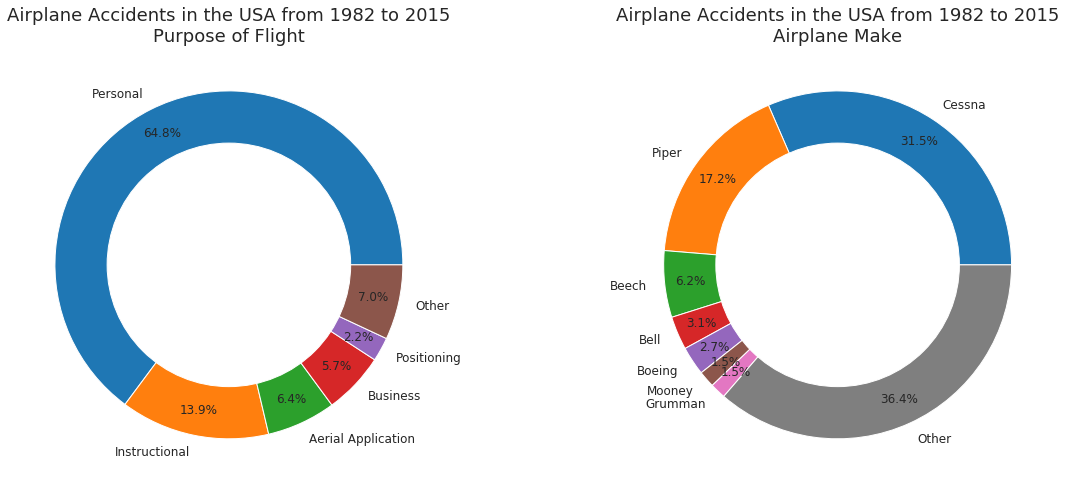

In [15]:
accidents_per_purpose = data_clean["Purpose of Flight"].value_counts()
accidents_per_purpose.drop("Unknown",inplace=True)
accidents_per_purpose["Other"] = accidents_per_purpose.loc[accidents_per_purpose < 1200].sum() # sum all the accidents with less than 1200 occurences
accidents_per_purpose=accidents_per_purpose.loc[accidents_per_purpose > 1200]

accidents_per_make = data_clean["Make"].value_counts()
accidents_per_make["Other"] = accidents_per_make.loc[accidents_per_make < 1000].sum() # sum all the accidents with less than 500 occurences
accidents_per_make=accidents_per_make.loc[accidents_per_make > 1000]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax1, ax2 = axes.flatten() # Easier to work with the axes this way instead of coordinates

donut_plot(accidents_per_purpose,"Purpose of Flight",axis=ax1)
donut_plot(accidents_per_make,"Airplane Make",axis=ax2)

We can see how most of the airplane accidents occurred in personal and instructional flights, followed by aerial application (i.e. spraying crops) and business flights.
Most of the accidents occured in airplanes made by Cessna and Piper.

In [16]:
# - \# of injuries per month
# - \# of accidents per air carrier
# - \# Investigate CESSNA and PIPER models: number of accidents
# - Phase of flight where accidents occur -donut plot